<a href="https://colab.research.google.com/github/aakashmohikar/Domestic-Violence-Against-Women-and-Girls-EDA-/blob/main/Domestic_Violence_Against_Women_and_Girls_(Exploratory_Data_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
from google.colab import files
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
upload=files.upload()

Saving violence_data.csv to violence_data.csv
Saving wikipedia-iso-country-codes.csv to wikipedia-iso-country-codes.csv


In [2]:
violence_data = pd.read_csv('/content/violence_data.csv')
#violence_data = pd.read_csv('/content/drive/MyDrive/violence_data.csv')
#print(violence_data[:20])
violence_data.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,1/1/15,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,1/1/15,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,1/1/15,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,1/1/15,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,1/1/15,13.8


In [ ]:
#print(violence_data[:20])
#violence_data = violence_data.dropna(axis=0,how='any')
#print(violence_data[:20])
#filter = violence_data['Gender'] == 'F'
#violence_data.where(filter, inplace=True)
#violence_data


In [3]:
#females= violence_data['Gender'].tolist().count('F')
EVEN_ROW_COLOR = "#cfb6f0"
ODD_ROW_COLOR = "#a8caed"

demographics_df = violence_data.groupby(["Demographics Question", "Demographics Response"])["Value"].agg(["median", "max","min", "mean"]).reset_index()
demographics_df.columns = ["Question", "Response" ,"Median", "Max","Min" ,"Mean"]
print("Violence % median, max, and mean per demographic group")
demographics_df.sort_values(["Question", "Mean"])

demographics_df
# demographics_df.style.set_table_styles(
#    [
#        {
#            'selector': 'th',
#            'props': [('background-color', '#77d0ed')]
#        },
#        {
#            'selector': 'tbody tr:nth-child(even)',
#            'props': [('background-color', EVEN_ROW_COLOR)]
#        },
#      {
#            'selector': 'tbody tr:nth-child(odd)',
#            'props': [('background-color', ODD_ROW_COLOR)]
#         }
#    ]
# )

Violence % median, max, and mean per demographic group


,Question,Response,Median,Max,Min,Mean
0,Age,15-24,17.50,80.1,0.1,21.084169
1,Age,25-34,14.45,81.5,0.1,19.703562
2,Age,35-49,14.15,81.0,0.2,19.336412
3,Education,Higher,4.20,74.6,0.0,8.898670
4,Education,No education,21.55,82.0,0.0,25.403125
5,Education,Primary,18.40,80.5,0.1,22.819093
6,Education,Secondary,13.05,76.7,0.2,17.378892
7,Employment,Employed for cash,14.85,81.5,0.1,19.553804
8,Employment,Employed for kind,20.15,86.9,0.3,24.445541
9,Employment,Unemployed,14.55,80.1,0.0,19.539710


In [4]:
demoq_df = violence_data.groupby(["Demographics Question", "Demographics Response", "Question"])["Value"].agg(["median", "max", "min", "mean"]).reset_index()
demoq_df.columns = ["Demographics Question", "Demographics Response", "Question", "Median", "Max", "Min", "Mean"]
print("Violence % median, min, max, and mean per demographic group and question asked")
demoq_df = demoq_df.sort_values(["Demographics Question", "Demographics Response", "Median"])
#demoq_df[:20]

Violence % median, min, max, and mean per demographic group and question asked


       15-24      25-34      35-49                                 Question
0  35.877344  32.903906  31.810938     ... for at least one specific reason
1  20.304032  18.932258  18.691935               ... if she argues with him
2  10.098387   8.885484   8.856452                ... if she burns the food
3  21.026563  20.360156  20.131250  ... if she goes out without telling him
4  25.306250  23.267969  22.346094         ... if she neglects the children
5  13.404762  13.411111  13.746825  ... if she refuses to have sex with him


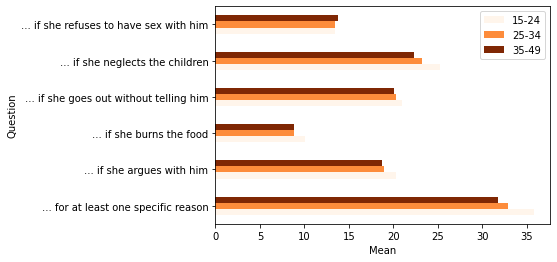

In [5]:
demographics_df = violence_data.groupby(["Demographics Question", "Demographics Response", "Question"])["Value"].agg(["mean"]).reset_index()
filter = demographics_df["Demographics Question"] == "Age"
demographics_df.where(filter, inplace=True)
demographics_df = demographics_df.dropna()
demographics_df.drop("Demographics Question", inplace=True, axis=1)
demographics_df.sort_values(["Question", "Demographics Response"])
df = pd.DataFrame({
  '15-24': (demographics_df.loc[demographics_df["Demographics Response"] == "15-24"])["mean"].tolist(),
  '25-34': (demographics_df.loc[demographics_df["Demographics Response"] == "25-34"])["mean"].tolist(),
  '35-49': (demographics_df.loc[demographics_df["Demographics Response"] == "35-49"])["mean"].tolist(),
  'Question': demographics_df["Question"].unique()
})

ax=df.plot(x="Question", rot=360, kind='barh',colormap='Oranges')
ax.set_xlabel("Mean")

print(df)


           F          M                                 Question
0  36.680116  29.011254     ... for at least one specific reason
1  21.619284  15.761968               ... if she argues with him
2  11.683400   6.172053                ... if she burns the food
3  23.515541  15.832825  ... if she goes out without telling him
4  26.855695  19.338570         ... if she neglects the children
5  16.823363   8.803337  ... if she refuses to have sex with him


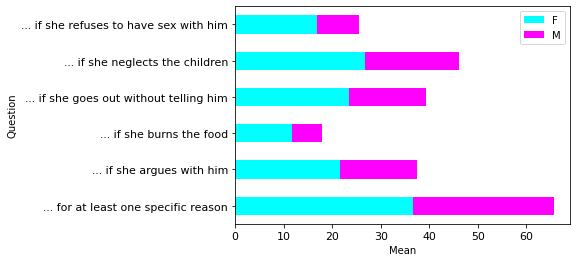

In [6]:
demographics_df = violence_data.groupby(["Gender", "Question"])["Value"].agg(["mean"]).reset_index()
demographics_df
demographics_df.sort_values(["Question", "Gender"])


df = pd.DataFrame({
    'F': (demographics_df.loc[demographics_df["Gender"] == "F"])["mean"].tolist(),
    'M': (demographics_df.loc[demographics_df["Gender"] == "M"])["mean"].tolist(),
    'Question': demographics_df["Question"].unique()
})
df
ax=df.plot(x="Question",rot=360, kind='barh',fontsize = 11, colormap='cool', stacked=True)
ax.set_xlabel("Mean")
print(df)


      Higher  Secondary    Primary  No education  \
0  17.473228  30.941406  37.675610     39.819328   
1   7.912195  16.407258  21.924370     24.899130   
2   2.817073   7.238710  11.256303     13.211304   
3   8.687402  17.394531  23.387805     26.213445   
4  11.663780  21.785937  26.391870     28.228571   
5   4.547200  10.043651  15.758678     19.521368   

                                  Question  
0     ... for at least one specific reason  
1               ... if she argues with him  
2                ... if she burns the food  
3  ... if she goes out without telling him  
4         ... if she neglects the children  
5  ... if she refuses to have sex with him  


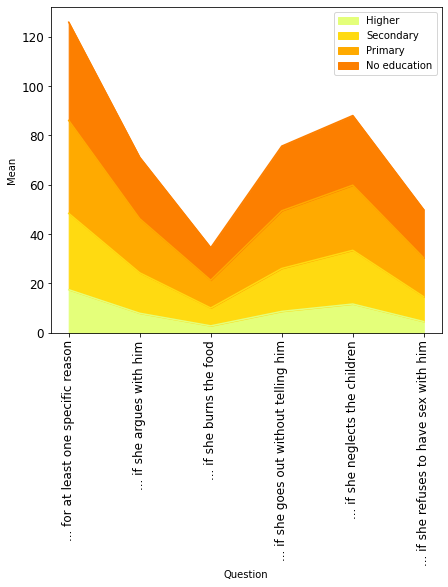

In [8]:
demographics_df = violence_data.groupby(["Demographics Question", "Demographics Response", "Question"])["Value"].agg(["mean"]).reset_index()
filter = demographics_df["Demographics Question"] == "Education"
demographics_df.where(filter, inplace=True)
demographics_df = demographics_df.dropna()
demographics_df.drop("Demographics Question", inplace=True, axis=1)
demographics_df.sort_values(["Question", "Demographics Response"])


df = pd.DataFrame({
    'Higher': (demographics_df.loc[demographics_df["Demographics Response"] == "Higher"])["mean"].tolist(),
    'Secondary': (demographics_df.loc[demographics_df["Demographics Response"] == "Secondary"])["mean"].tolist(),
    'Primary': (demographics_df.loc[demographics_df["Demographics Response"] == "Primary"])["mean"].tolist(),
    'No education': (demographics_df.loc[demographics_df["Demographics Response"] == "No education"])["mean"].tolist(),
    'Question': demographics_df["Question"].unique()
})

df.plot.area(x="Question",ylabel="Mean",rot=90, fontsize = 12,figsize=[7,6], colormap='Wistia')
print(df)

                      0          1
Higher         9.527628   8.148688
Secondary     19.399518  14.934111
Primary       26.699022  17.844514
No education  30.438619  19.112780


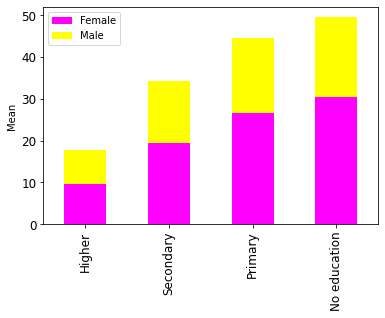

In [9]:
demographics_df = violence_data.groupby(["Demographics Question", "Demographics Response","Gender"])["Value"].agg(["mean"]).reset_index()
filter = demographics_df["Demographics Question"] == "Education"
demographics_df.where(filter, inplace=True)
demographics_df = demographics_df.dropna()
demographics_df.drop("Demographics Question", inplace=True, axis=1)
demographics_df.sort_values(["Gender", "Demographics Response"])


df = pd.DataFrame({
    'Higher': (demographics_df.loc[demographics_df["Demographics Response"] == "Higher"])["mean"].tolist(),
    'Secondary': (demographics_df.loc[demographics_df["Demographics Response"] == "Secondary"])["mean"].tolist(),
    'Primary': (demographics_df.loc[demographics_df["Demographics Response"] == "Primary"])["mean"].tolist(),
    'No education': (demographics_df.loc[demographics_df["Demographics Response"] == "No education"])["mean"].tolist(),
    #'Gender': demographics_df["Gender"].unique()
})
df_transpose = df.T
df_transpose.plot(ylabel="Mean",rot=90, fontsize = 12, colormap='spring', kind='bar', stacked=True,)
plt.legend(["Female", "Male"]);
print(df_transpose)

In [10]:
gb = violence_data.groupby('Demographics Question')
residence = gb.get_group('Residence')
residence
# res_groupby = residence.groupby('Demographics Response')
# res_groupby.get_group('Rural')

# eb = violence_data.groupby('Demographics Question')
# education = eb.get_group('Education')
# ed_groupby = education.groupby('Demographics Response')
# ed_groupby.get_group('Higher')

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
8,1,Afghanistan,F,Residence,Rural,... if she burns the food,1/1/15,18.1
11,1,Afghanistan,F,Residence,Urban,... if she burns the food,1/1/15,18.3
17,1,Afghanistan,M,Residence,Urban,... if she burns the food,1/1/15,4.6
27,1,Afghanistan,M,Residence,Rural,... if she burns the food,1/1/15,9.7
95,351,Afghanistan,F,Residence,Rural,... for at least one specific reason,1/1/15,82.1
...,...,...,...,...,...,...,...,...
12595,210,Zimbabwe,M,Residence,Urban,... if she goes out without telling him,1/1/15,11.8
12596,280,Zimbabwe,M,Residence,Rural,... if she neglects the children,1/1/15,20.1
12597,280,Zimbabwe,M,Residence,Urban,... if she neglects the children,1/1/15,15.0
12598,350,Zimbabwe,M,Residence,Rural,... if she refuses to have sex with him,1/1/15,7.2


    Survey Year  Value
0          2000  36.30
1          2001   5.40
2          2002  48.70
3          2003  48.90
4          2005   7.75
5          2006  16.70
6          2007   2.35
7          2008   9.45
8          2009   6.80
9          2010  19.65
10         2011  18.20
11         2012  15.25
12         2013  17.20
13         2014  15.25
14         2015  11.70
15         2016  14.90
16         2017  13.20
17         2018  41.50


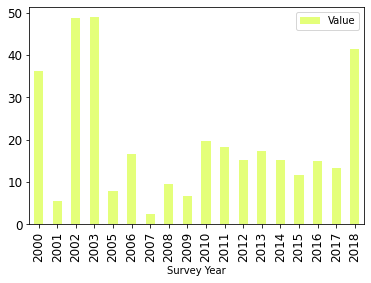

In [11]:
#demographics_df = violence_data.groupby(["Demo])["Value"].agg(["mean"]).reset_index()
violence_data['Survey Year'] = pd.to_datetime(violence_data['Survey Year'])

df_mean = violence_data.groupby([violence_data['Survey Year'].dt.year])['Value'].median().reset_index()
#print(df_mean)

# xticks = df_mean['Survey Year'].tolist()
# xticks_short = [v for i, v in enumerate(xticks) if i % 5 == 0]

# for country in df_mean['Country'].unique():
#   print(df_mean.loc[df_mean["Country"] == country])
print(df_mean)

df_mean.plot(x='Survey Year', kind='bar',rot=90,fontsize = 12, colormap='Wistia')

# ax.set_xticks(range(0, 20, 2))
# ax.set_xticklabels(range(2000, 2020, 2))



   Unemployed  Employed for cash  Employed for kind  \
0   33.146875          32.908065          39.933600   
1   18.735484          18.808333          23.684298   
2    9.135484           8.860000          12.284298   
3   19.493750          20.008871          24.720000   
4   23.407812          23.323387          28.506400   
5   12.864286          13.045161          17.012195   

                                  Question  
0     ... for at least one specific reason  
1               ... if she argues with him  
2                ... if she burns the food  
3  ... if she goes out without telling him  
4         ... if she neglects the children  
5  ... if she refuses to have sex with him  


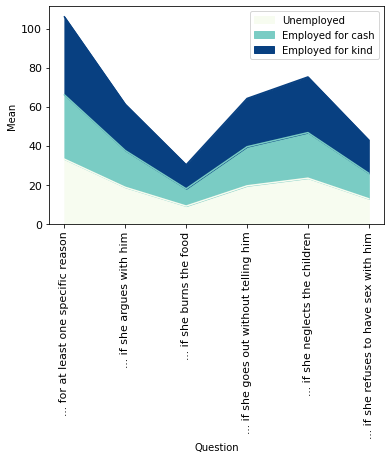

In [12]:
demographics_df = violence_data.groupby(["Demographics Question", "Demographics Response", "Question"])["Value"].agg(["mean"]).reset_index()
filter = demographics_df["Demographics Question"] == "Employment"
demographics_df.where(filter, inplace=True)
demographics_df = demographics_df.dropna()
demographics_df.drop("Demographics Question", inplace=True, axis=1)
demographics_df.sort_values(["Question", "Demographics Response"])


df = pd.DataFrame({
    'Unemployed': (demographics_df.loc[demographics_df["Demographics Response"] == "Unemployed"])["mean"].tolist(),
    'Employed for cash': (demographics_df.loc[demographics_df["Demographics Response"] == "Employed for cash"])["mean"].tolist(),
    'Employed for kind': (demographics_df.loc[demographics_df["Demographics Response"] == "Employed for kind"])["mean"].tolist(),
    'Question': demographics_df["Question"].unique()
})

df.plot.area(x="Question",ylabel="Mean",rot=90,colormap='GnBu',fontsize = 11)
print(df)

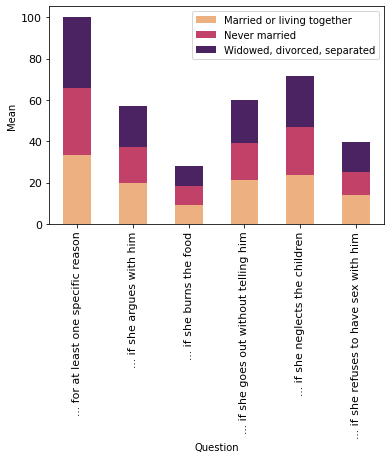

In [13]:
demographics_df = violence_data.groupby(["Demographics Question", "Demographics Response", "Question"])["Value"].agg(["mean"]).reset_index()
filter = demographics_df["Demographics Question"] == "Marital status"
demographics_df.where(filter, inplace=True)
demographics_df = demographics_df.dropna()
demographics_df.drop("Demographics Question", inplace=True, axis=1)
demographics_df.sort_values(["Question", "Demographics Response"])


df = pd.DataFrame({
    'Married or living together': (demographics_df.loc[demographics_df["Demographics Response"] == "Married or living together"])["mean"].tolist(),
    'Never married': (demographics_df.loc[demographics_df["Demographics Response"] == "Never married"])["mean"].tolist(),
    'Widowed, divorced, separated': (demographics_df.loc[demographics_df["Demographics Response"] == "Widowed, divorced, separated"])["mean"].tolist(),
    'Question': demographics_df["Question"].unique()
})

df.plot(x="Question",ylabel="Mean",rot=90,colormap='flare',fontsize = 11, kind="bar",stacked=True)

       Urban      Rural                                 Question
0  28.313281  37.867188     ... for at least one specific reason
1  15.037903  22.682258               ... if she argues with him
2   6.350806  11.540323                ... if she burns the food
3  15.951562  23.970312  ... if she goes out without telling him
4  19.711719  26.977344         ... if she neglects the children
5   9.585714  16.230159  ... if she refuses to have sex with him


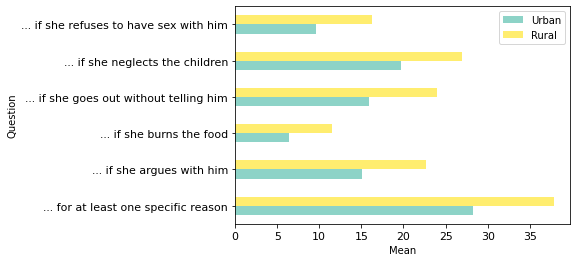

In [14]:
demographics_df = violence_data.groupby(["Demographics Question", "Demographics Response", "Question"])["Value"].agg(["mean"]).reset_index()
filter = demographics_df["Demographics Question"] == "Residence"
demographics_df.where(filter, inplace=True)
demographics_df = demographics_df.dropna()
demographics_df.drop("Demographics Question", inplace=True, axis=1)
demographics_df.sort_values(["Question", "Demographics Response"])


df = pd.DataFrame({
    'Urban': (demographics_df.loc[demographics_df["Demographics Response"] == "Urban"])["mean"].tolist(),
    'Rural': (demographics_df.loc[demographics_df["Demographics Response"] == "Rural"])["mean"].tolist(),
    'Question': demographics_df["Question"].unique()
})

ax = df.plot(x="Question", rot=360,colormap='Set3',fontsize = 11, kind="barh")
ax.set_xlabel("Mean")
print(df)

In [15]:
country_df = pd.read_csv('/content/wikipedia-iso-country-codes.csv')
country_df.columns = ["Country", "A2C", "A3C", "Num","ISO"]
datac_df = violence_data.merge(country_df)
df = datac_df.groupby(["Country", "A3C"])["Value"].agg(["median", "max", "min", "mean"]).reset_index()
df.columns = ["Country", "A3C", "Median", "Max", "Min", "Mean"]


In [16]:
def show_on_map(df, aggregate, title):
    fig = go.Figure(data=go.Choropleth(
        locations = df['A3C'],
        z = df[aggregate],
        text = df['Country'],
        colorscale = 'sunsetdark',
        autocolorscale=False,
        reversescale=False,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_tickprefix = '%',
        colorbar_title = 'Violence %',
    ))

    fig.update_layout(
        title_text=title,
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        ),
        annotations = [dict(
            x=0.55,
            y=0.1,
            xref='paper',
            yref='paper',
            text='Source: <a href="https://www.kaggle.com/andrewmvd/violence-against-women-and-girls">\
                Violence against Women and Girls</a>',
            showarrow = False
        )]
    )

    fig.show()

In [17]:
show_on_map(df, "Mean", "Violence against Women and Girls - Country mean level of violence[%]")
print(df)

        Country  A3C  Median   Max  Min       Mean
0   Afghanistan  AFG   44.50  86.9  4.5  42.683333
1       Albania  ALB    3.75  29.7  0.0   5.417778
2        Angola  AGO   11.80  37.4  0.6  13.202222
3       Armenia  ARM    6.95  47.0  0.0   9.553571
4    Azerbaijan  AZE   33.95  74.3  1.5  32.666071
..          ...  ...     ...   ...  ...        ...
59       Uganda  UGA   23.60  59.8  1.5  24.840556
60      Ukraine  UKR    2.35  22.0  0.1   3.692308
61        Yemen  YEM   28.20  61.6  1.3  27.621111
62       Zambia  ZMB   23.90  63.7  0.7  24.361667
63     Zimbabwe  ZWE   16.60  55.2  1.1  18.170556

[64 rows x 6 columns]


In [18]:
print(df)

        Country  A3C  Median   Max  Min       Mean
0   Afghanistan  AFG   44.50  86.9  4.5  42.683333
1       Albania  ALB    3.75  29.7  0.0   5.417778
2        Angola  AGO   11.80  37.4  0.6  13.202222
3       Armenia  ARM    6.95  47.0  0.0   9.553571
4    Azerbaijan  AZE   33.95  74.3  1.5  32.666071
..          ...  ...     ...   ...  ...        ...
59       Uganda  UGA   23.60  59.8  1.5  24.840556
60      Ukraine  UKR    2.35  22.0  0.1   3.692308
61        Yemen  YEM   28.20  61.6  1.3  27.621111
62       Zambia  ZMB   23.90  63.7  0.7  24.361667
63     Zimbabwe  ZWE   16.60  55.2  1.1  18.170556

[64 rows x 6 columns]


In [19]:
def show_on_map(df, aggregate, title):
    fig = go.Figure(data=go.Choropleth(
        locations = df['A3C'],
        z = df[aggregate],
        text = df['Country'],
        colorscale = 'YlOrRd',
        autocolorscale=False,
        reversescale=False,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_tickprefix = '%',
        colorbar_title = 'Violence %',
    ))

    fig.update_layout(
        title_text=title,
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        ),
        annotations = [dict(
            x=0.55,
            y=0.1,
            xref='paper',
            yref='paper',
            text='Source: <a href="https://www.kaggle.com/andrewmvd/violence-against-women-and-girls">\
                Violence against Women and Girls</a>',
            showarrow = False
        )]
    )

    fig.show()

filter_df = datac_df.loc[datac_df["Demographics Response"]=="No education"]
df = filter_df.groupby(["Country", "A3C"])["Value"].agg(["mean"]).reset_index()
df.columns = ["Country", "A3C", "Mean"]
show_on_map(df, "Mean", "Violence against Women with No education - Country Median level of violence [%]")

                                      0          1
Married or living together    24.869639  14.508163
Never married                 19.872280  17.317231
Widowed, divorced, separated  22.609880  18.311276


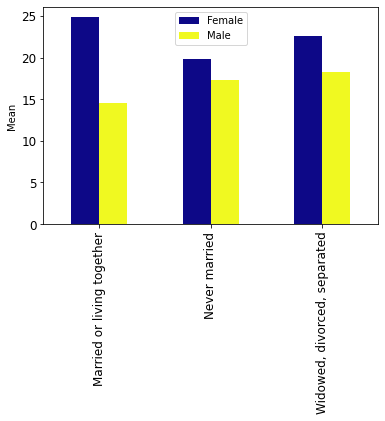

In [20]:
demographics_df = violence_data.groupby(["Demographics Question", "Demographics Response","Gender"])["Value"].agg(["mean"]).reset_index()
filter = demographics_df["Demographics Question"] == "Marital status"
demographics_df.where(filter, inplace=True)
demographics_df = demographics_df.dropna()
demographics_df.drop("Demographics Question", inplace=True, axis=1)
demographics_df.sort_values(["Gender", "Demographics Response"])


df = pd.DataFrame({
    'Married or living together': (demographics_df.loc[demographics_df["Demographics Response"] == "Married or living together"])["mean"].tolist(),
    'Never married': (demographics_df.loc[demographics_df["Demographics Response"] == "Never married"])["mean"].tolist(),
    'Widowed, divorced, separated': (demographics_df.loc[demographics_df["Demographics Response"] == "Widowed, divorced, separated"])["mean"].tolist(),
    #'Gender': demographics_df["Gender"].unique()
})
#print(df)
df_transpose = df.T
df_transpose.plot(ylabel="Mean",rot=90, fontsize = 12, colormap='plasma', kind='bar')
plt.legend(["Female", "Male"]);
print(df_transpose)